In [ ]:
# import os
# import pandas as pd
# import requests
# from PIL import Image
# from io import BytesIO
# from zipfile import ZipFile


# # Load your dataset
# csv_path = '/content/drive/MyDrive/ML-Week/Data.csv'
# df = pd.read_csv(csv_path)

# # Create the productImages folder
# output_folder = '/content/drive/MyDrive/ML-Week/productImages'
# os.makedirs(output_folder, exist_ok=True)

# # Function to download and save images
# def download_and_save_image(image_url, output_path):
#     response = requests.get(image_url)

#     # Check if the response is successful and the content is an image
#     if response.status_code == 200 and response.headers['Content-Type'].startswith('image'):
#         img = Image.open(BytesIO(response.content))

#         # Convert image to RGB mode if it's in RGBA mode
#         if img.mode == 'RGBA':
#             img = img.convert('RGB')

#         img.save(output_path)
#     else:
#         print(f"Failed to download image from {image_url}")

# # Loop through the DataFrame and download images
# for _, row in df.iterrows():
#     product_id = row['Product ID']
#     image_url = row['image_link']
#     output_path = os.path.join(output_folder, f'{product_id}.jpg')
#     download_and_save_image(image_url, output_path)

# # Create a zip file of the folder
# zip_file_path = '/content/drive/MyDrive/productImages.zip'
# with ZipFile(zip_file_path, 'w') as zipf:
#     for root, _, files in os.walk(output_folder):
#         for file in files:
#             zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), output_folder))

# # Provide a link to download the zip file
# zip_file_path

In [ ]:
import os
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
# Example image database
image_folder_path = '/content/drive/MyDrive/ML-Week/productImages'
image_database = [os.path.join(image_folder_path, img) for img in os.listdir(image_folder_path)]

In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [ ]:
def get_features(img_path):
    img_array = preprocess_image(img_path)
    features = model.predict(img_array)
    return features.flatten()

In [ ]:
def get_top_knn_recommendations(user_image_path, image_database, top_k=5):
    # Extract features for user-provided image
    user_features = get_features(user_image_path)

    # Extract features for all images in the database
    database_features = [get_features(img_path) for img_path in image_database]

    # Use k-NN to find the top similar images
    knn = NearestNeighbors(n_neighbors=top_k, metric='cosine')
    knn.fit(database_features)
    distances, indices = knn.kneighbors([user_features])

    # Display top recommendations with subplots
    fig, axs = plt.subplots(1, top_k, figsize=(15, 5))

    for i, idx in enumerate(indices[0]):
        img_path = image_database[idx]
        similarity = 1 - distances[0][i]  # Convert distance to similarity
        img = Image.open(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"Recommendation {i + 1}\nSimilarity: {similarity:.2f}")

    plt.show()

1/1 [==============================] - 0s 243ms/step


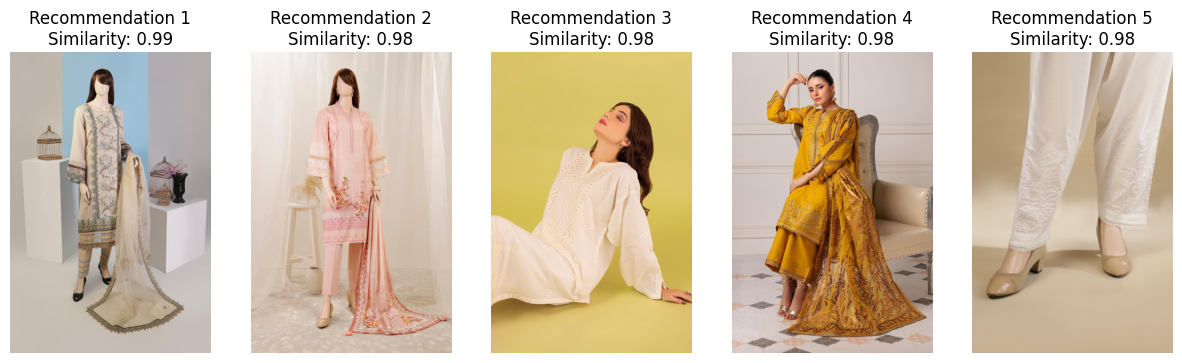

In [ ]:
user_image_path = '/content/women.jpg'
get_top_knn_recommendations(user_image_path, image_database)

1/1 [==============================] - 0s 219ms/step


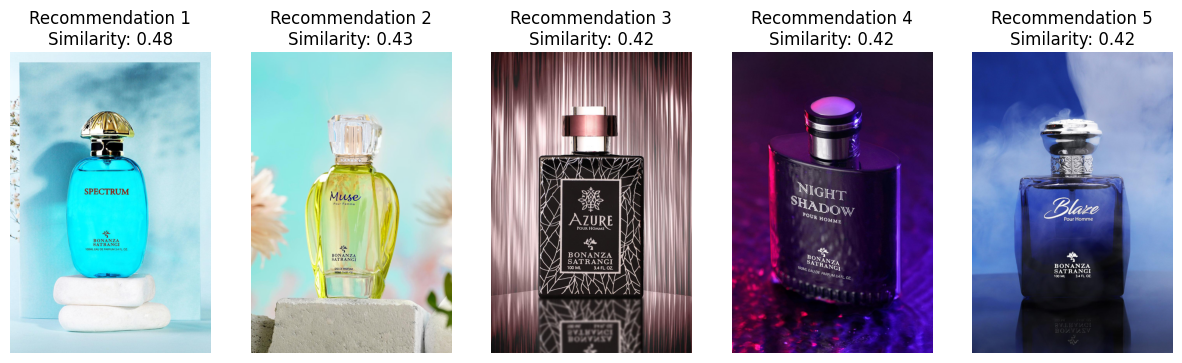

In [ ]:
user_image_path = '/content/perfume.jpg'
get_top_knn_recommendations(user_image_path, image_database)